**Classification of CANCER/TUMOR/ANESYMER**

In [ ]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 53.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 84.2 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252692 sha256=f58a71f29

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import plot
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import cv2

In [ ]:
import os
import csv

main_folder = "/content/drive/MyDrive/Data_images"
csv_file_path = "image_data.csv"

# Open CSV file in write mode
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    # Write header to CSV file
    csv_writer.writerow(['dcm', 'jpg', 'type'])

    # Traverse the main folder
    for class_folder in os.listdir(main_folder):
        class_folder_path = os.path.join(main_folder, class_folder)

        # Check if it's a directory
        if os.path.isdir(class_folder_path):
            # Traverse images in the class subfolder
            for image_file in os.listdir(class_folder_path):
                # Check if it's a file with a common image extension (you can modify this check based on your image types)
                if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    # Construct the image paths
                    dcm_path = os.path.join(class_folder, image_file)
                    jpg_path = os.path.join(class_folder, image_file.replace('.dcm', '.jpg'))
                    class_name = class_folder

                    # Write the image paths and class to the CSV file
                    csv_writer.writerow([dcm_path, jpg_path, class_name])

print(f"CSV file '{csv_file_path}' created successfully.")


CSV file 'image_data.csv' created successfully.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_images/image_data.csv',dtype={'type':'category'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   dcm     320 non-null    object  
 1   jpg     320 non-null    object  
 2   type    320 non-null    category
dtypes: category(1), object(2)
memory usage: 5.6+ KB


<Axes: xlabel='count', ylabel='type'>

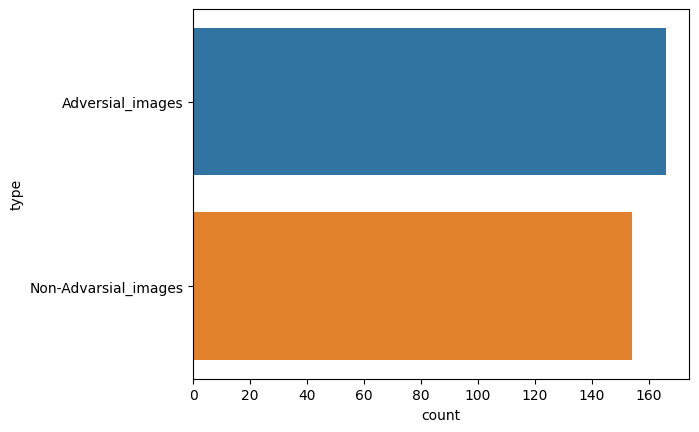

In [ ]:
sns.countplot(y=df['type'])

In [ ]:
df.head()

,dcm,jpg,type
0,Non-Advarsial_images/aneurysm (12).jpg,Non-Advarsial_images/aneurysm (12).jpg,Non-Advarsial_images
1,Non-Advarsial_images/aneurysm (13).jpg,Non-Advarsial_images/aneurysm (13).jpg,Non-Advarsial_images
2,Non-Advarsial_images/aneurysm (1).jpg,Non-Advarsial_images/aneurysm (1).jpg,Non-Advarsial_images
3,Non-Advarsial_images/aneurysm (17).jpg,Non-Advarsial_images/aneurysm (17).jpg,Non-Advarsial_images
4,Non-Advarsial_images/aneurysm (28).jpg,Non-Advarsial_images/aneurysm (28).jpg,Non-Advarsial_images


In [ ]:
import os

In [ ]:
# Encoding the label
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['type'])
num_classes = len(label_encoder.classes_)

# Loading and preprocessing the image
images = []
for index, row in df.iterrows():
    image = cv2.imread(f'/content/drive/MyDrive/Data_images/{row["jpg"]}')
    image = cv2.resize(image, (224, 224))  # Resize the image if needed
    image = image.astype('float32') / 255.0  # Normalize pixel values
    images.append(image)

# Convert list to numpy array
images = np.array(images)
labels = np.array(labels)

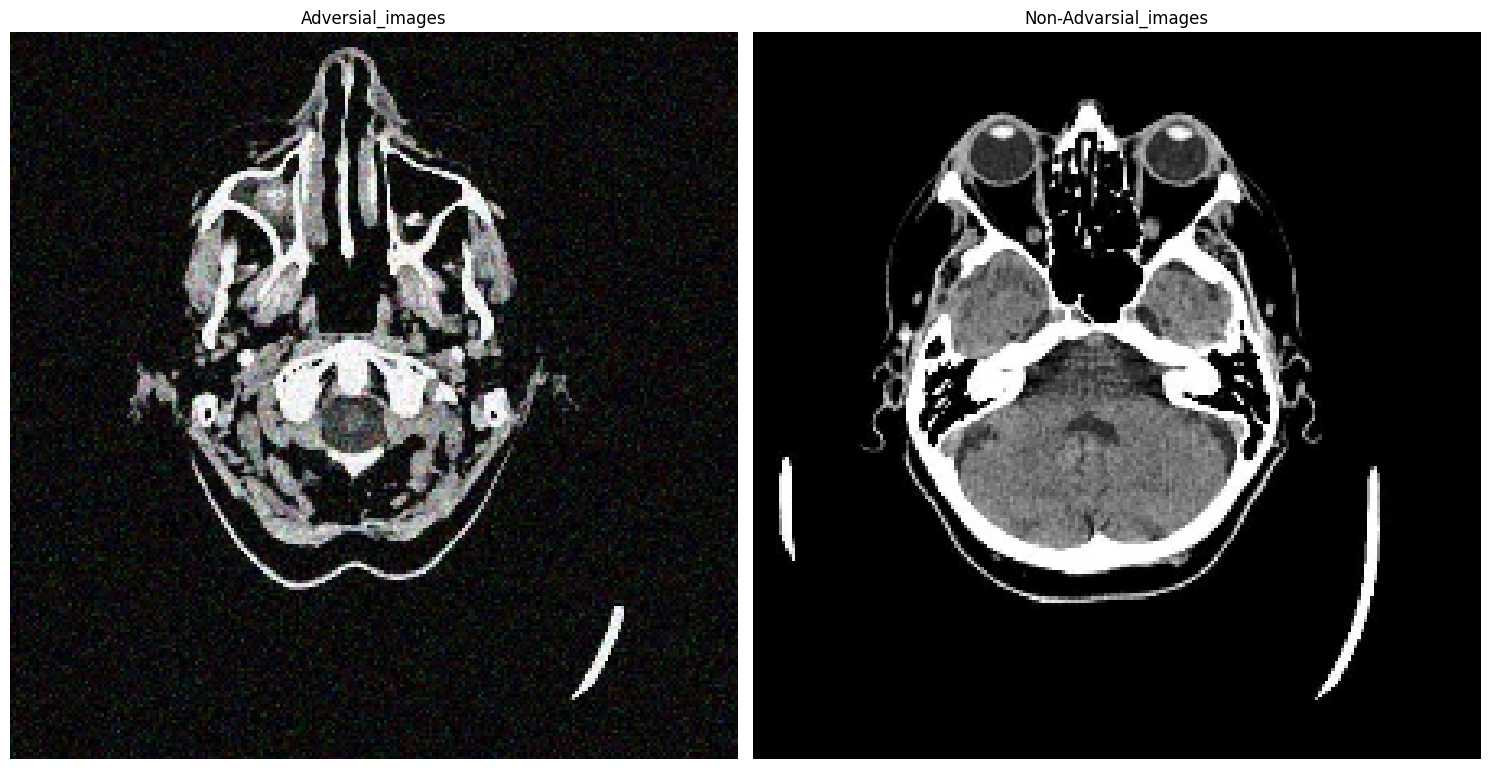

In [ ]:
import matplotlib.pyplot as plt

# Display some sample images from each class
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

fig, axes = plt.subplots(1,num_classes, figsize=(15, 15))

for i, ax in enumerate(axes.flat):
    # Taking sample pictures from class i
    images_class_i = images[labels == i]
    # Showing 5 sample images from class i
    for j in range(5):
        ax.imshow(images_class_i[j])
        ax.axis('off')
        ax.set_title(class_names[i])
    ax.set_title(class_names[i])
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 2
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/2
8/8 [==============================] - 3s 165ms/step - loss: 1.1703 - accuracy: 0.5820 - val_loss: 0.5977 - val_accuracy: 0.6250
Epoch 2/2
2/2 [==============================] - 0s 21ms/step - loss: 0.0543 - accuracy: 0.9844
Test Loss: 0.05425998196005821, Test Accuracy: 0.984375


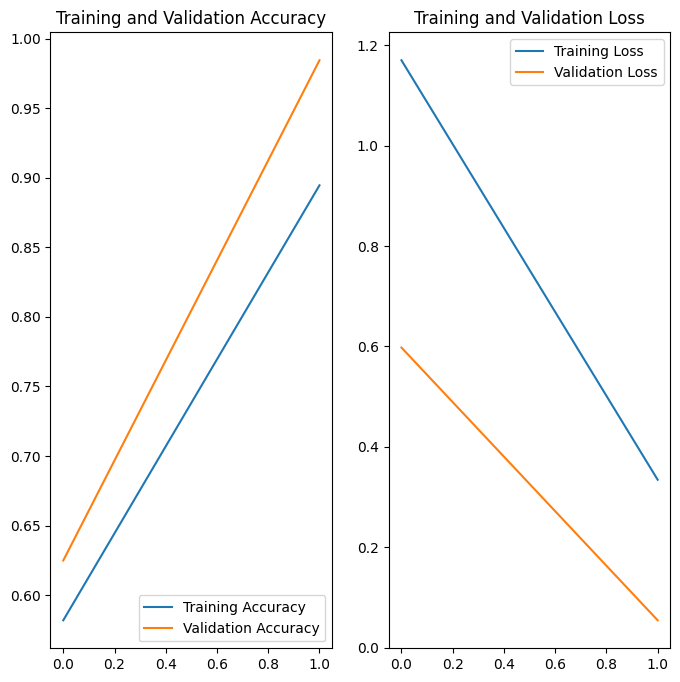

In [ ]:
#Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#loss
loss = history.history['loss']
val_loss = history.history['val_loss']

#epochs
epochs_range = range(num_epochs)

#Plotting graphs
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 26, 26, 128)      

In [ ]:
model.save("ad_classification_model.h5")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the test image
img_path = '/content/drive/MyDrive/Data_images/Non-Advarsial_images/aneurysm (1).jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values to be between 0 and 1

# Make predictions using your trained model
predictions = model.predict(img_array)

# Assuming you have a list of class labels
class_labels = ["Adversial_images","Non-Advarsial_images"]  # Replace with your actual class labels

# Get the predicted class
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_class_label}")


1/1 [==============================] - 0s 33ms/step
Predicted class: Non-Advarsial_images
